
envokes a mail client to send an email to??assignment 1 and email
<h1 align="center">ECE 4438B Advanced Image Processing and Analysis</h1>
<h3 align="center">Assignment #1</h3>
<h4 align="center">Jianhui Li,  <a href="mailto:ljianhui@uwo.ca?subject=Assignment1">ljianhui@uwo.ca</a></h4>
<h4 align="center">Mechatronic Systems Engineering</h4>
<h4 align="center">Western University</h4>
<h4 align="center">Date of submission: Feb. 8th, 2019</h4>
<h4 align="center">Submitted to: Elvis C.S. Chen</h4>


In [1]:
#Task 2
# Load (import) SimpleITK module into the Python interpretor, rename it as sitk 
import SimpleITK as sitk
# Load (import) matplotlib.pyplot module and rename it as plt
import matplotlib.pyplot as plt

In [14]:
print(sitk.Version())

SimpleITK Version: 1.2.0 (ITK 4.13)
Compiled: Jan  3 2019 15:43:30



In [15]:
%env SITK_SHOW_COMMAND /Applications/ITK-SNAP.app/Contents/MacOS/ITK-SNAP 
# change the external tool into ITK-SNAP
#Inmy labtop, the imageJ does not work


env: SITK_SHOW_COMMAND=/Applications/ITK-SNAP.app/Contents/MacOS/ITK-SNAP


In [16]:
# Retrieve a CT volumetric file  'spine.mha' from the same documentation, 
image = sitk.ReadImage("spine.mha")

# get the size (number of voels) of the volume
voxel1=(image.GetSize())

#get the physical size of the voxel
print(image.GetSpacing())

#The image slice from the middle of the stack according to the z axis
midz = voxel1[2]//2 
#Display this 2D mid-Depth image, the order is xyz
sitk.Show(image[:,:,midz])


(0.307768, 0.307768, 0.307768)


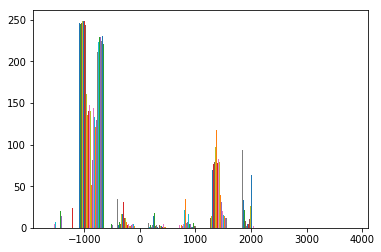

In [17]:

# create a plot
plt.figure() 
# the order of GetArrayViewFromImage function is zyx, hist, show the histagram
plt.hist(sitk.GetArrayViewFromImage(image)[midz,:,:]) 
  # Title
plt.title("Histogram")  
 # X label Hounsfield unit (HU) scale, the range is automatically set
plt.xlabel("Pixel Intensity")   
 # Y label the number of pixel in this picture slice
plt.ylabel("Occurance")    
plt.show()    # show figure


In [6]:
#task 5:
# create filter called thresholdfilter
thresholdFilter = sitk.BinaryThresholdImageFilter() 
#load the 3d picture as vol
vol = sitk.ReadImage('spine.mha') 
# lower threshold set to 1000
thresholdFilter.SetLowerThreshold(1000)
# upper threshold set to 1000
thresholdFilter.SetUpperThreshold(2001)
# Inside range display as white
thresholdFilter.SetInsideValue(255)
# outside range display as black
thresholdFilter.SetOutsideValue(0)
# run the filter output to segmentedVolume
segmentedVolume=thresholdFilter.Execute(vol)
# display the slice in x,y,midz
sitk.Show(segmentedVolume[:,:,midz])

#using SimpleITK's built-in Show() command, display the segmented 2D image corresponding to the pre-segmented 2D image in task 3 (1 mark)
##HINT If you are not certain on the usage of any SimpleITK filter/class, how can you get some help?

In [7]:
#task 6:
# Save segmentedVolume as 'segmented_spine.mha'
sitk.WriteImage(segmentedVolume, 'segmented_spine.mha')



# Task 7
* Image Modality used: CT (Computer Tomography)
* High density objects like metal and bone shows up brighter than lower density surrounding
* Bone and Air
* Bone is the object (material) of interest. It is radio opaque. Cancellous bone is aroung 300-400HU, cortical bone is around 1800-1900HU.
* From the histogram, the lower pixels -1000 corresponding to air，bone corresponding to the higher pixel intensity which represents highter density than water（0 HU）.
* <img src="1.jpeg" style="width:200px"/>

